## Import key modules and functions

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os

from scKTLD import edge2adj
from scKTLD import callTLD
from scKTLD import displayTLD
from scKTLD import metrics_similarity

%matplotlib inline

## experimental single-cell data

(3961, 3961)
neg 0.005233049392700195
sparsesvd time 0.9376740455627441
Chebyshev expansion
Node embedding done!
Starting TAD boundary detection
TAD boundary detection Done!
(3961, 3961)
neg 0.0047414302825927734
sparsesvd time 0.8368306159973145
Chebyshev expansion
Node embedding done!


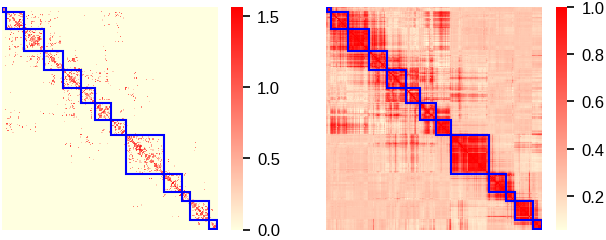

In [2]:
## sparse input

path_input = "./data/exp-sc/gm12878_cell7_chr3_sparse.txt"
graph_edge = np.loadtxt(path_input)
chr='chr3'
resolution = 50000

graph_adj = edge2adj(graph_edge, chr = chr, resolution = resolution, reference = "hg19")
boundary_spec = callTLD(graph_adj)
displayTLD(graph_adj, boundary_spec, 800, 1000, brecon = True)

(3961, 3961)
neg 0.007819414138793945
sparsesvd time 1.0943222045898438
Chebyshev expansion
Node embedding done!
Starting TAD boundary detection
TAD boundary detection Done!
(3961, 3961)
neg 0.004200458526611328
sparsesvd time 1.107485294342041
Chebyshev expansion
Node embedding done!


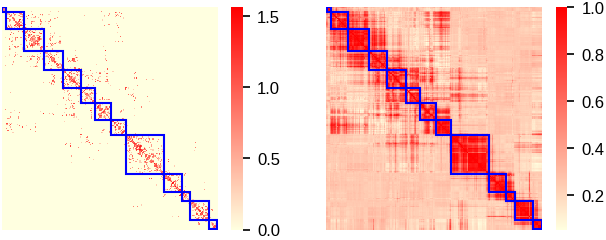

In [4]:
## dense input 
## this may take long for loading
## before running, please unzip the data

path_input = "./data/exp-sc/gm12878_cell7_chr3_dense.txt"
graph_adj = np.loadtxt(path_input)
boundary_spec = callTLD(graph_adj)
displayTLD(graph_adj, boundary_spec, 800, 1000, brecon = True)

## simulated single-cell data

In [5]:
## call TAD-like domains on simulated single-cell Hi-C data

dir_input1 = "./data/simulate-sc/chr8_25M-30M_thre_750"
dir_input2 = "./data/simulate-sc/chr8_100M-105M_thre_750"

## input for similarity calculation
arr_cluster_1 = np.zeros((100, 100))
list_domain_1 = []
arr_cluster_2 = np.zeros((100, 100))
list_domain_2 = []

## call TAD like domains
m=0
for cell in os.listdir(dir_input1):
    path_input1 = dir_input1+"/"+cell
    graph_adj = np.loadtxt(path_input1)
    boundary_spec = callTLD(graph_adj, dimension=16)
    cluster_temp = np.repeat(np.arange(0, len(boundary_spec)-1), np.diff(boundary_spec))
    cluster_temp = np.append(cluster_temp, cluster_temp[-1])
    arr_cluster_1[m,:] = cluster_temp
    list_domain_1.append(np.vstack((boundary_spec[:-1], boundary_spec[1:])).transpose())
    m=m+1

m=0
boundary2=[]
for cell in os.listdir(dir_input2):
    path_input2 = dir_input2+"/"+cell
    graph_adj = np.loadtxt(path_input2)
    boundary_spec = callTLD(graph_adj, dimension=16)
    cluster_temp = np.repeat(np.arange(0, len(boundary_spec)-1), np.diff(boundary_spec))
    cluster_temp = np.append(cluster_temp, cluster_temp[-1])
    arr_cluster_2[m,:] = cluster_temp
    list_domain_2.append(np.vstack((boundary_spec[:-1], boundary_spec[1:])).transpose())
    m=m+1
mat_cluster = np.vstack((arr_cluster_1, arr_cluster_2))
list_domain_1.extend(list_domain_2)
list_domain = list_domain_1

(100, 100)
neg 0.002413034439086914
sparsesvd time 0.005229473114013672
Chebyshev expansion
Node embedding done!
Starting TAD boundary detection
TAD boundary detection Done!
(100, 100)
neg 0.002191781997680664
sparsesvd time 0.011689901351928711
Chebyshev expansion
Node embedding done!
Starting TAD boundary detection
TAD boundary detection Done!
(100, 100)
neg 0.0020017623901367188
sparsesvd time 0.005518436431884766
Chebyshev expansion
Node embedding done!
Starting TAD boundary detection
TAD boundary detection Done!
(100, 100)
neg 0.0020885467529296875
sparsesvd time 0.01087045669555664
Chebyshev expansion
Node embedding done!
Starting TAD boundary detection
TAD boundary detection Done!
(100, 100)
neg 0.0020928382873535156
sparsesvd time 0.0065691471099853516
Chebyshev expansion
Node embedding done!
Starting TAD boundary detection
TAD boundary detection Done!
(100, 100)
neg 0.0020599365234375
sparsesvd time 0.00553441047668457
Chebyshev expansion
Node embedding done!
Starting TAD boun

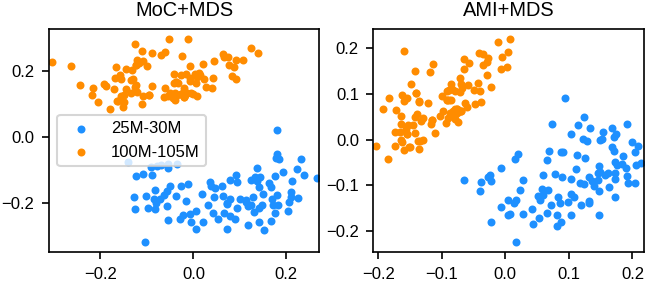

In [34]:
## embedding and visualization

## calculate similarity
simi_moc = np.zeros((200, 200))
for i in range(0, 200):
    for j in range(0, i+1):
        simi_moc[i,j] = metrics_similarity.moc(list_domain[i], list_domain[j])
simi_moc = simi_moc+simi_moc.T - np.diag(np.diag(simi_moc))

simi_ami = np.zeros((200, 200))
for i in range(0, 200):
    for j in range(0, i+1):
        simi_ami[i,j] = metrics_similarity.ami(mat_cluster[i], mat_cluster[j])
simi_ami = simi_ami+simi_ami.T - np.diag(np.diag(simi_ami))


## mds embedding and visualization by scatter plot
fig = plt.figure(figsize=(13.0/2.54,5.0/2.54), constrained_layout=False, dpi=150)
plt.rcParams['font.sans-serif']='Liberation Sans'
plt.rcParams['font.size']=8
plt.rcParams['axes.xmargin']=0.01
plt.rcParams['axes.xmargin']=0.01
plt.rcParams['savefig.pad_inches']=0.01
plt.rcParams['savefig.bbox']='tight'

mds = sklearn.manifold.MDS(n_components=2, dissimilarity= 'precomputed')
embedding = mds.fit_transform(1-simi_moc)
plt.subplot2grid((1,2),(0,0), rowspan = 1, colspan = 1)
plt.title("MoC+MDS")
plt.scatter(embedding[0:100, 0], embedding[0:100, 1], c = 'dodgerblue', s=8)
plt.scatter(embedding[100:200, 0], embedding[100:200, 1], c = 'darkorange', s=8)
plt.legend(["25M-30M", "100M-105M"])

mds = sklearn.manifold.MDS(n_components=2, dissimilarity= 'precomputed')
embedding = mds.fit_transform(1-simi_ami)
plt.subplot2grid((1,2),(0,1), rowspan = 1, colspan = 1)
plt.title("AMI+MDS")
plt.scatter(embedding[0:100, 0], embedding[0:100, 1], c = 'dodgerblue', s=8)
plt.scatter(embedding[100:200, 0], embedding[100:200, 1], c = 'darkorange', s=8)
